# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP (he will teach the Geopanda lecture).
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


We are trying to do the analysis on the MTA turnstile data to find the trends, periodicity and outliers.
The MTA has 23 different Subway card types, which we will make a note of as we go forward.



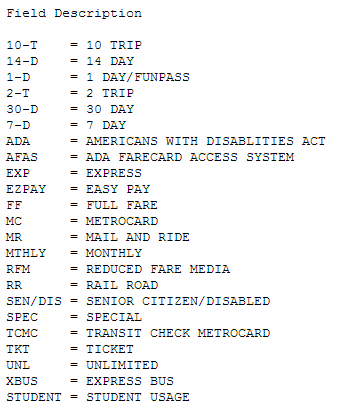

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)

## note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the no.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```


as opposed to just 

use the no.nansum etc
```
np.mean(mtarides)
np.sum(mtarides)
```

# 0_Imports :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

# 1_Load the Data :

In [3]:
mta_fare_1 = np.load("MTA_Fare.npy")
mta_fare_1

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [4]:
#Checking the shape of the Datacube

mta_fare_1.shape

(600, 23, 194)

In [5]:
# Converting the Data type to float

mta_fare_1 = np.array(mta_fare_1, dtype='int')
mta_fare_1 = np.array(mta_fare_1, dtype='float')
mta_fare_1

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [ -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
          -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [6]:
#Converting the '-1' values to 'NaN' 

def conv_nan(data):
    if data == -1:
        return np.nan
    else:
        return data

vconv_nan = np.vectorize(conv_nan)

In [7]:
vconv_nan(mta_fare_1)

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [8]:
#Task - 1: 

#Identifying the most prominent events

mta_fare_1.shape

(600, 23, 194)

In [9]:
# Consolidating the data of all 600 stations and 23 card types by No: of trips per week

mta_fare_cons = np.zeros(194)
mta_fare_cons

for i in range(600):
    for j in range(23):
        mta_fare_cons = mta_fare_cons + mta_fare_1[i,j,:]
        
mta_fare_cons

array([ 26716631.,  29262313.,  29597575.,  29383978.,  29182176.,
        26208052.,  28680022.,  29122010.,  28800200.,  28595932.,
        28308361.,  27927423.,  27268131.,  28246743.,  26683582.,
        30015142.,  30180176.,  29048486.,  30065000.,  29168839.,
        30323454.,  30186700.,  29983681.,  30049876.,  30125402.,
        25160821.,  29185649.,  30577220.,  30103021.,  27557647.,
        21799403.,  21792798.,  27479553.,  27108970.,  26010345.,
        26430220.,  28656503.,  29100353.,  29573058.,  26718018.,
        29176634.,  29397046.,  29876972.,  29673828.,  29521768.,
        30172126.,  30193061.,  28496477.,  29031851.,  30394695.,
        29988635.,  29949834.,  27144981.,  29846497.,  30162349.,
        29975652.,  30294451.,  26740659.,  29964051.,  29471983.,
        29249492.,  29426206.,  29059658.,  27976524.,  27921014.,
        22981394.,  28139307.,  31992892.,  32503085.,  24294628.,
        32156059.,  30744539.,  32638048.,  32901236.,  319506

In [10]:
df_mtafare_cons = pd.DataFrame()
df_mtafare_cons['Week Start'] = pd.date_range(start='05/27/2010', end='02/7/2014',freq='W')
df_mtafare_cons['Trips'] = pd.DataFrame(mta_fare_cons)
df_mtafare_cons.head()

#Based on the given dates, I find that the No: of weeks between the given dates are found to be 196. 
# In order to adjust for the 194 data points I shifted the end date by 2 weeks. But this might not be correct, 
# and the given data set might be missing some data. Need to verify this.

Week Start       Trips
0 2010-05-30  26716631.0
1 2010-06-06  29262313.0
2 2010-06-13  29597575.0
3 2010-06-20  29383978.0
4 2010-06-27  29182176.0

In [11]:
#Identifying the weeks that have trips outside 3 standard deviations of mean trips across this dataset

event_1 = df_mtafare_cons[(df_mtafare_cons['Trips'] > (np.nanmean(df_mtafare_cons['Trips']) + (3 * np.nanstd(df_mtafare_cons['Trips'])))) | \
((df_mtafare_cons['Trips'] < (np.nanmean(df_mtafare_cons['Trips']) - (3 * np.nanstd(df_mtafare_cons['Trips'])))))]

event_1
#We found that week 127 which has 5215466 trips falls outside 3 standard deviations of the mean. 

Week Start      Trips
126 2012-10-28  5215466.0

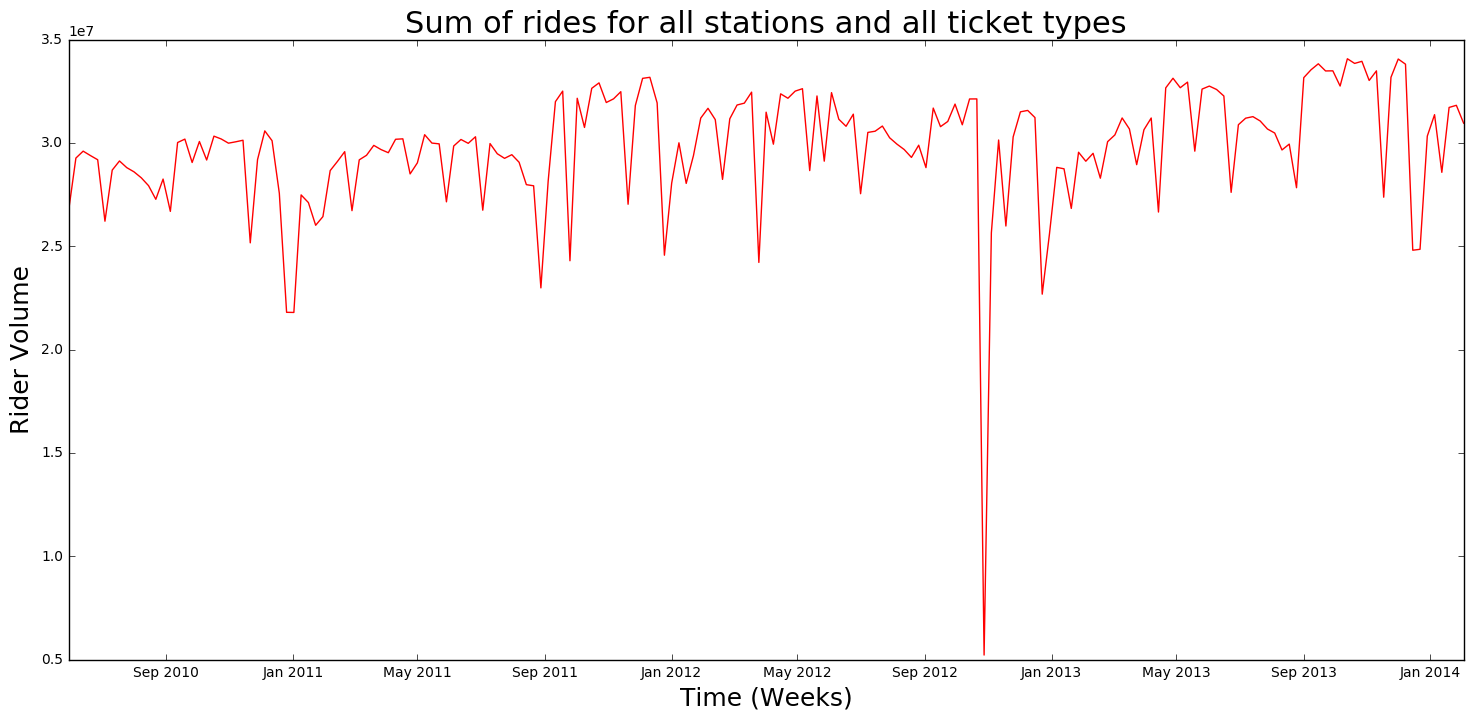

In [48]:
plt.figure(figsize=(18,8))
pl.plot(df_mtafare_cons['Week Start'], df_mtafare_cons['Trips'], 'r')
pl.ylabel("Rider Volume", fontsize=18)
pl.xlabel("Time (Weeks)", fontsize=18)
pl.title("Sum of rides for all stations and all ticket types", fontsize=22)

### Fig_1: Ridership Volume based on Time Line

### Task-1 Conclusion : Event Detected

From the above data I found that there is a sudden drop in the No: of trips to 5.2m in the 127th week around 21st October,2012. 

The event leading to this sudden drop was found to be Hurricane Sandy. But Hurricane Sandy hit New York on October 29th, so I feel that the data should be shifted be a week in order to account for this correctly.

Now, I have made the shift in week accordinly so that the drop is rightly accounted for in the week of 28th October

# -----------------------------------------------------------------------------------------------------

In [13]:
#Task - 2: 

#Analyze the 23 Ridership Types for Trends

mta_fare_1.shape

(600, 23, 194)

In [64]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez', 
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t', 
            'umlim','xbus','stud'])
#            ['10 TRIP','14 DAY', '1 DAY/FUNPASS', '2 TRIP', '30 DAY', '7 DAY', \
#            'AMERICANS WITH DISABILITIES ACT', 'ADA FARECARD ACCESS SYSTEM', 'EXPRESS', \
#            'EASY PAY', 'FULL FARE', 'METROCARD', 'MAIL AND RIDE', 'MONTHLY', \
#            'REDUCED FARE MEDIA', 'RAIL ROAD', 'SENIOR CITIZEN/DISABLED', 'SPECIAL', \
#            'TRANSIT CHECK METROCARD', 'TICKET', 'UNLIMITED', 'EXPRESS BUS', 'STUDENT USAGE'])

df_ridetype = pd.DataFrame()
df_ridetype['Rider_type'] = np.array(['10 TRIP','14 DAY', '1 DAY/FUNPASS', '2 TRIP', '30 DAY', '7 DAY', 'AMERICANS WITH DISABILITIES ACT', \
'ADA FARECARD ACCESS SYSTEM', 'EXPRESS', 'EASY PAY', 'FULL FARE', 'METROCARD', 'MAIL AND RIDE', 'MONTHLY', \
'REDUCED FARE MEDIA', 'RAIL ROAD', 'SENIOR CITIZEN/DISABLED', 'SPECIAL', 'TRANSIT CHECK METROCARD', \
'TICKET', 'UNLIMITED', 'EXPRESS BUS', 'STUDENT USAGE'])
df_ridetype.index = ridetype
df_ridetype


Rider_type
10t                            10 TRIP
14d                             14 DAY
1d                       1 DAY/FUNPASS
2t                              2 TRIP
30d                             30 DAY
7d                               7 DAY
ada    AMERICANS WITH DISABILITIES ACT
afas        ADA FARECARD ACCESS SYSTEM
exp                            EXPRESS
ez                            EASY PAY
ff                           FULL FARE
mc                           METROCARD
mr                       MAIL AND RIDE
month                          MONTHLY
rfm                 REDUCED FARE MEDIA
rr                           RAIL ROAD
sen            SENIOR CITIZEN/DISABLED
spec                           SPECIAL
tcmc           TRANSIT CHECK METROCARD
t                               TICKET
umlim                        UNLIMITED
xbus                       EXPRESS BUS
stud                     STUDENT USAGE

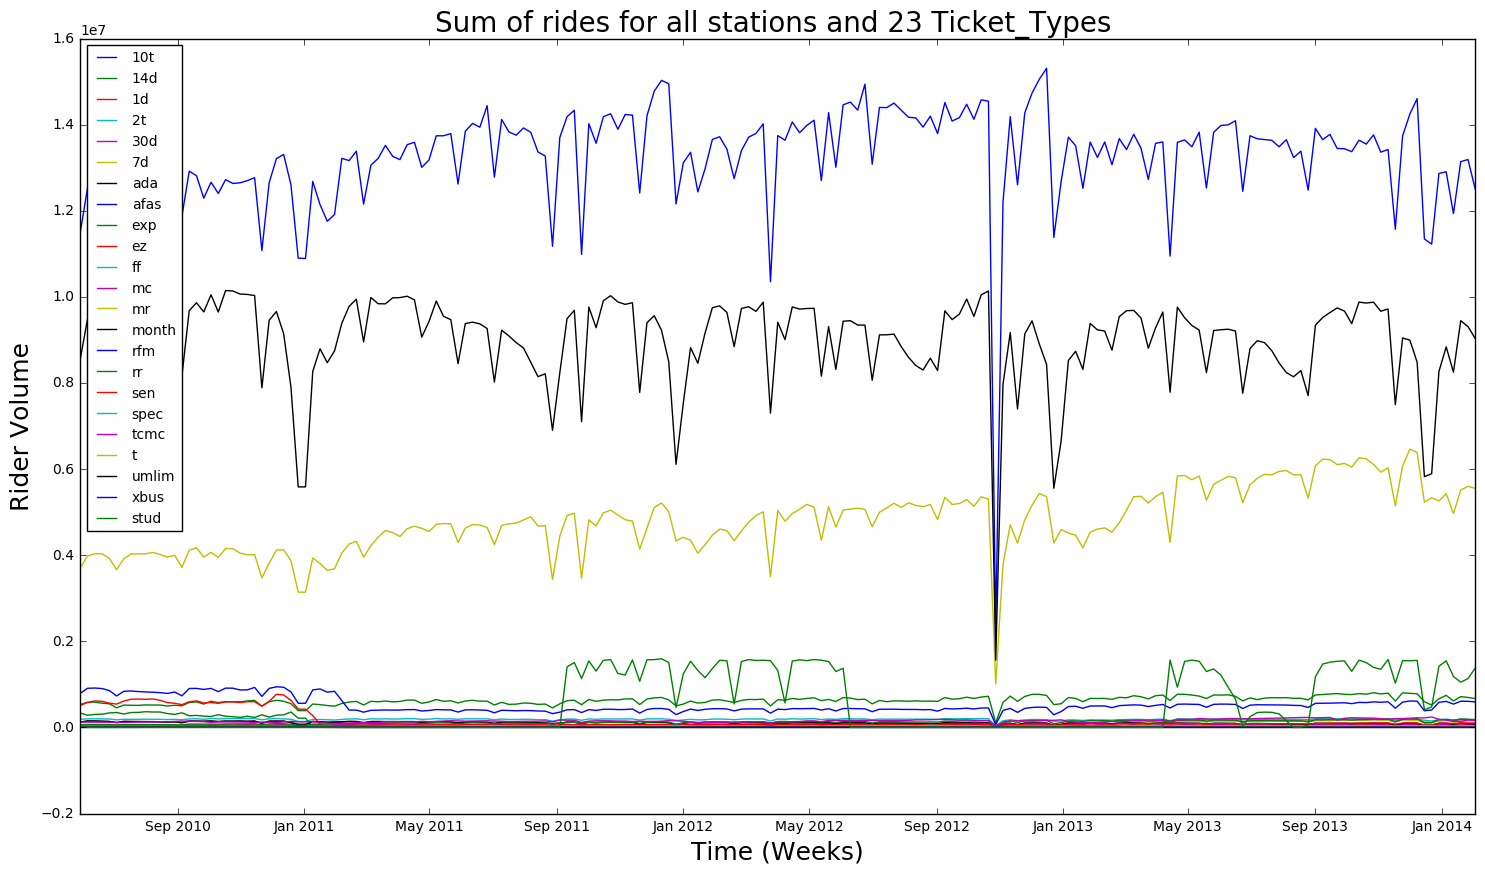

In [40]:
mta_ridership_cons = np.zeros((23,194))
mta_ridership_cons

df_ridership = pd.DataFrame()
df_ridership['Week Start'] = pd.date_range(start='05/28/2010', end='02/7/2014',freq='W')

#Summing up the data for the 600 Train Stations
for i in range(600):
    mta_ridership_cons = mta_ridership_cons + mta_fare_1[i,:,:]

plt.figure(figsize=(18,10))

for j in range(23):
    df_ridership['Type_'+str(j)] = pd.DataFrame(mta_ridership_cons[j,:])
    pl.plot(df_ridership['Week Start'], df_ridership['Type_'+str(j)])
    pl.ylabel("Rider Volume", fontsize=18)
    pl.xlabel("Time (Weeks)", fontsize=18)
    pl.title("Sum of rides for all stations and 23 Ticket_Types ", fontsize=20)
    pl.legend(ridetype, loc='best', fontsize=10)
    
    
    #df_ridership.plot(title=(str('Type_')+str(j+1)),figsize=(8,2))

## Fig_2: 

In [41]:
df_ridership['Week Start'] = pd.date_range(start='05/28/2010', end='02/7/2014',freq='W')
df_ridership.index = df_ridership['Week Start']
df_ridership = df_ridership.drop('Week Start',axis=1)
df_ridership.columns = ridetype
df_ridership.head()

10t       14d       1d        2t      30d         7d  \
Week Start                                                                
2010-05-30  11494477.0  530386.0  47663.0  186413.0  46670.0  3697305.0   
2010-06-06  12526720.0  583394.0  51347.0  199090.0  64214.0  3981669.0   
2010-06-13  12766490.0  586057.0  51499.0  199531.0  56857.0  4032893.0   
2010-06-20  12653538.0  562465.0  51926.0  196252.0  37292.0  4032616.0   
2010-06-27  12809558.0  548722.0  51017.0  194747.0  35074.0  3925310.0   

                  ada     afas       exp        ez  ...       month       rfm  \
Week Start                                          ...                         
2010-05-30  8551799.0   9925.0  333059.0  511894.0  ...    122996.0  789972.0   
2010-06-06  9486255.0  11708.0  282616.0  577884.0  ...    151809.0  907929.0   
2010-06-13  9476401.0  12140.0  301891.0  615400.0  ...    151401.0  913987.0   
2010-06-20  9449944.0  11084.0  305376.0  606133.0  ...    146957.0  902412.0   
2010-06-27  9293866.0  10379.0  335644.0  563310.0  ...    137752.0  855437.0   

                 rr      sen   spec      tcmc        t   umlim   xbus   stud  
Week Start                                                                    
2010-05-30  59671.0  28083.0 -138.0  124555.0  20922.0  5990.0  220.0 -600.0  
2010-06-06  69070.0  32194.0 -139.0  121574.0  21531.0  5981.0  335.0 -600.0  
2010-06-13  69437.0  32481.0 -137.0  122044.0  21296.0  6353.0  328.0 -600.0  
2010-06-20  67962.0  32267.0 -137.0  121914.0  21493.0  6453.0  347.0 -600.0  
2010-06-27  66241.0  31797.0   40.0  119640.0  20161.0  6177.0  316.0 -600.0  

[5 rows x 23 columns]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()


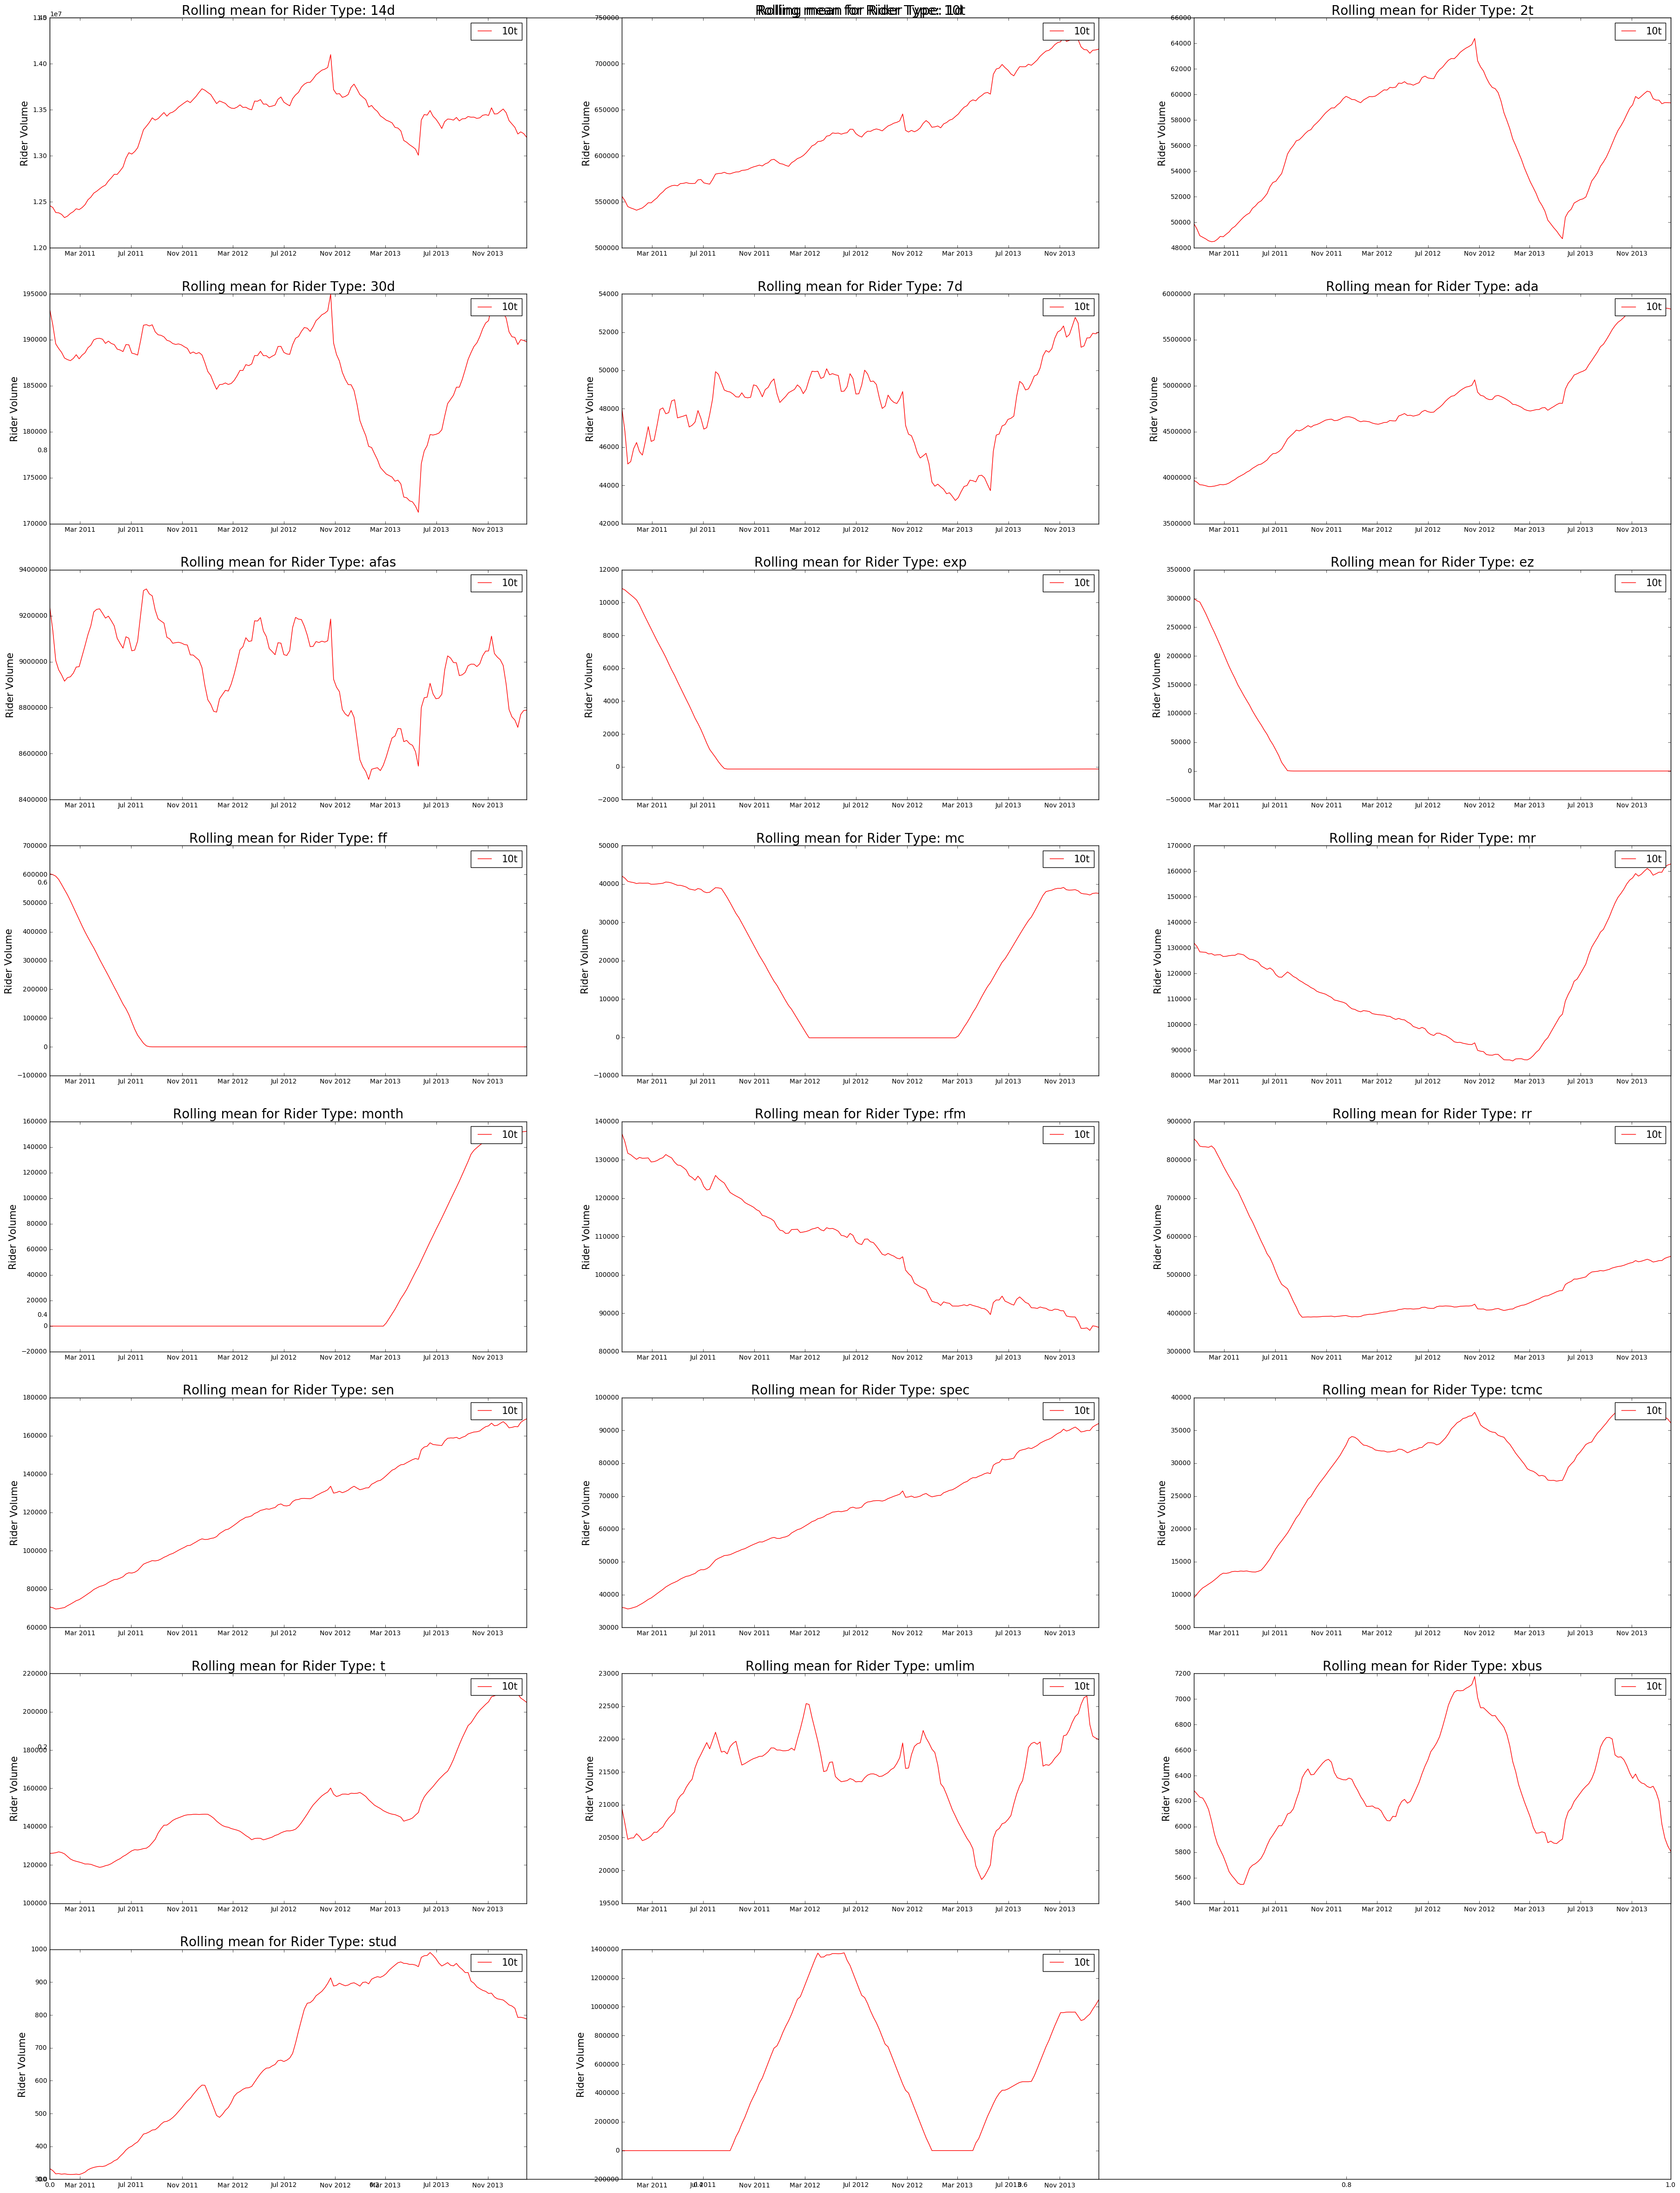

In [70]:
fig = plt.figure(figsize=(45,60)) 
x = 1

for i in ridetype:
    plt.title('Rolling mean for Rider Type: '+str(i),fontsize = 20)
    mean1 = pd.rolling_mean(df_ridership[i], 30)
    ax = fig.add_subplot(8,3,x)
    ax.plot(df_ridership.index, mean1, 'r')
    pl.ylabel("Rider Volume", fontsize=15)
    #pl.xlabel("Week", fontsize=15)
    pl.legend(ridetype, fontsize = 15)
    x = x+1  

## Fig_3: 

The plots show the increasing or decreasing trends for the rider types.
It can be seen that 14 day, 7 day, railroad, senior, special, transitcheck metrocard and expressbus have upward trends whereas monthly passes have a downward trend.

In [147]:
smoothrides = np.empty_like(mta_fare_1[0])
countratio = np.zeros(len(mta_fare_1[0]), float)
for i in range(mta_fare_1.shape[1]):
    mta_allsum = mta_fare_1[:,i,:]
    
    #rolling mean to smooth structure on short time scales and summing over all stations
    smoothrides[i] = pd.rolling_mean(np.nansum(mta_allsum, axis=0), 10)
    countratio[i] = np.nanmean(smoothrides[i][:10])/np.nanmean(smoothrides[i][-10:])
    print ('%10s rider type \t ratio of %s \t standard deviation %s' \
           %(ridetype[i],countratio[i],np.nanstd(smoothrides[i])))

       10t rider type 	 ratio of 0.951681784403 	 standard deviation 546777.616992
       14d rider type 	 ratio of 0.753056693835 	 standard deviation 64593.9013999
        1d rider type 	 ratio of 0.854224343773 	 standard deviation 5767.41249418
        2t rider type 	 ratio of 1.02775863514 	 standard deviation 8828.00385607
       30d rider type 	 ratio of 0.93477935432 	 standard deviation 3624.08852559
        7d rider type 	 ratio of 0.685982250186 	 standard deviation 631955.017784
       ada rider type 	 ratio of 1.08592961275 	 standard deviation 473487.373171
      afas rider type 	 ratio of 4924.34977578 	 standard deviation 3794.92677395
       exp rider type 	 ratio of 94109.1091954 	 standard deviation 101444.891854
        ez rider type 	 ratio of 503545.12605 	 standard deviation 206370.776156
        ff rider type 	 ratio of 1.15498991569 	 standard deviation 18800.9465287
        mc rider type 	 ratio of 0.812339682807 	 standard deviation 25371.3235538
        mr r

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI

# ----------------------------------------------------------------------------------------------------------

In [86]:
#Task - 3

Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [74]:
#Preparing the dataset
mta_fare_1 = np.where(mta_fare_1 !=-1, mta_fare_1, np.nan)
mta_fare_1

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [75]:
mta_stations = np.nansum(mta_fare_1, axis=1, dtype=None, out=None, keepdims=0)
mta_stations

array([[ 126878.,  149477.,  152383., ...,   78901.,   74591.,   76833.],
       [  37306.,   46464.,   49359., ...,       0.,       0.,       0.],
       [   6606.,    6881.,    7229., ...,    8171.,    7907.,    6790.],
       ..., 
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [84]:
df_mta_stations = pd.DataFrame(mta_stations.transpose())
df_mta_stations.index = pd.date_range(start='05/28/2010', end='02/14/2014',freq='W')
df_mta_stations.head()

0        1       2        3        4        5        6    \
2010-05-30  126878.0  37306.0  6606.0  16378.0  18564.0  19987.0  12449.0   
2010-06-06  149477.0  46464.0  6881.0  17408.0  19903.0  20625.0  13644.0   
2010-06-13  152383.0  49359.0  7229.0  17595.0  19948.0  21225.0  13719.0   
2010-06-20  160175.0  44849.0  5731.0  14242.0  16076.0  17412.0  11460.0   
2010-06-27  162641.0  41509.0  7032.0  17589.0  20283.0  20909.0  14094.0   

                7        8         9   ...   590  591  592  593  594  595  \
2010-05-30  11091.0  10482.0  147187.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-06  11659.0  11030.0  154826.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-13  12037.0  10881.0  155958.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-20   9809.0   9123.0  154914.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-27  11944.0  10923.0  157628.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   

            596  597  598  599  
2010-05-30  0.0  0.0  0.0  0.0  
2010-06-06  0.0  0.0  0.0  0.0  
2010-06-13  0.0  0.0  0.0  0.0  
2010-06-20  0.0  0.0  0.0  0.0  
2010-06-27  0.0  0.0  0.0  0.0  

[5 rows x 600 columns]

In [85]:
freq = 1
period = 52*freq
sample_rate = 1
duration = 194
N = duration * sample_rate

The absolute value of the fourier transform are used for the real frequencies (real = positive). Only the real frequencies by using the np.rfft function (instead of np.fft)
The real part of the Fourier transform is obtained by using the absolute value of the fourier transform or take the square of the fourier transforms of the real frequencies (positive) By doing so the complex part of the fourier transform is removed.

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


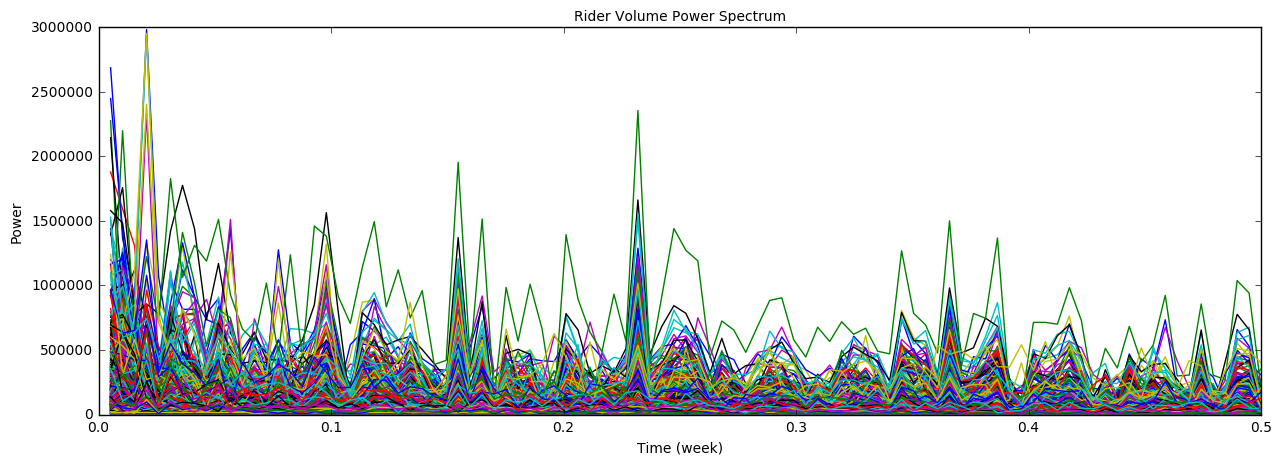

In [88]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

m = np.arange(0, 599, 1)
for i in m:
    f = np.abs(np.fft.rfft(df_mta_stations[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    pl.xlabel("Time (week)", fontsize=10)
    pl.ylabel("Power", fontsize=10)
    pl.title("Rider Volume Power Spectrum", fontsize=10)
    pl.legend(fontsize = 5)

## Fig_4: Rider Volume Power Spectrum

In [89]:
print ("periods where the Power is calculated: \n", 1.0/np.fft.rfftfreq(N, 1.0)[1:])

periods where the Power is calculated: 
 [ 194.           97.           64.66666667   48.5          38.8
   32.33333333   27.71428571   24.25         21.55555556   19.4
   17.63636364   16.16666667   14.92307692   13.85714286   12.93333333
   12.125        11.41176471   10.77777778   10.21052632    9.7
    9.23809524    8.81818182    8.43478261    8.08333333    7.76
    7.46153846    7.18518519    6.92857143    6.68965517    6.46666667
    6.25806452    6.0625        5.87878788    5.70588235    5.54285714
    5.38888889    5.24324324    5.10526316    4.97435897    4.85
    4.73170732    4.61904762    4.51162791    4.40909091    4.31111111
    4.2173913     4.12765957    4.04166667    3.95918367    3.88
    3.80392157    3.73076923    3.66037736    3.59259259    3.52727273
    3.46428571    3.40350877    3.34482759    3.28813559    3.23333333
    3.18032787    3.12903226    3.07936508    3.03125       2.98461538
    2.93939394    2.89552239    2.85294118    2.8115942     2.77142857
    

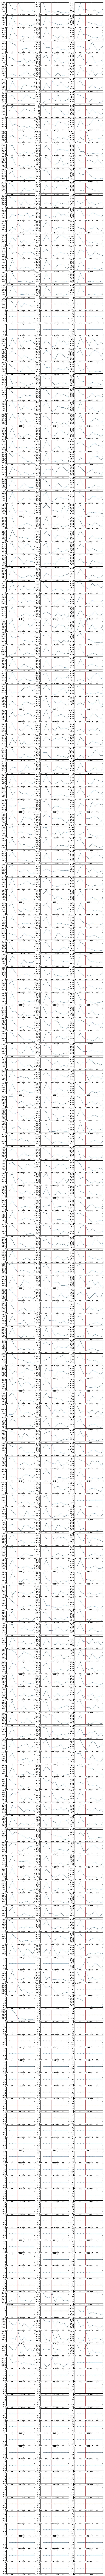

In [109]:
#Now we want to check the power spectrum by each station.
fig = plt.figure(figsize=(15,400)) 
x = 1

for i in range(600):
    f = np.abs(np.fft.rfft(df_mta_stations[i]))
    ax = fig.add_subplot(200,3,x)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-', color = 'SteelBlue')
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=4, color = 'SteelBlue',alpha=.5)
    plt.axvline(1.0/52, color='r', linestyle='-')
    pl.xlim (0,0.05)
    pl.ylim (0,30)
    #pl.xlabel("period", fontsize=1)
    #pl.ylabel("Power", fontsize=1)
    pl.title(str(i+1), fontsize=13)
    #pl.legend([i], fontsize = 8)
    x = x+1

The stations with the highest yearly periodicity are 0, 150, 194 and 327 (visually). These stations have values between 2.5 and 3 million in the power spectrums plotted above. The higher the value of the power spectrum at a given period, the higher the periodicity of that station at that time.

## Fig_5: Power Spectrum plots for the 600 Subway Stations

In [138]:
stn_ps = []

for i in range(599):
    stn_ps.append({'stn': i+1, 'PS': np.abs(np.fft.rfft(df_mta_stations.T.loc[i,:]))[4]})
    
df_stn_ps = pd.DataFrame(stn_ps)
df_stn_ps = df_stn_ps.sort_values(by='PS', ascending=False)
df_stn_ps.head(8)

PS  stn
0    2.980161e+06    1
194  2.950389e+06  195
150  2.931896e+06  151
327  2.402219e+06  328
32   2.329897e+06   33
539  1.351575e+06  540
19   1.324541e+06   20
169  1.221610e+06  170

The Stations 1, 195, 151, 328, 33 have a high Power Spectrum Value for the 52 weeks period.

The datacube's index would be starting for 0 hence we can find the data for these stations as below.

In [141]:
mta_fare_1[0,:,:]

array([[ 56961.,  64703.,  68002., ...,  36527.,  33929.,  36824.],
       [  1732.,   2083.,   2107., ...,   1264.,   1172.,   1238.],
       [   203.,    276.,    245., ...,    186.,    167.,    167.],
       ..., 
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [    nan,     nan,     nan, ...,   1121.,   1377.,    712.]])

In [142]:
mta_fare_1[194,:,:]

array([[ 106171.,   61269.,  120730., ...,   45313.,   42688.,   43332.],
       [   3155.,    2373.,    3178., ...,    2360.,    2133.,    2287.],
       [    372.,     385.,     383., ...,     424.,     384.,     356.],
       ..., 
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [     nan,      nan,      nan, ...,    6965.,    8756.,    3905.]])

In [143]:
mta_fare_1[150,:,:]

array([[ 76500.,  45402.,  42328., ...,  22087.,  20650.,  21559.],
       [  3366.,   2107.,   2223., ...,   1637.,   1465.,   1466.],
       [   279.,    204.,    205., ...,    158.,    143.,    175.],
       ..., 
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [    nan,     nan,     nan, ...,   3559.,   4198.,   1690.]])

In [144]:
mta_fare_1[327,:,:]

array([[  1.34300000e+04,   3.31820000e+04,   9.30100000e+03, ...,
          5.39700000e+03,   4.88100000e+03,   2.97280000e+04],
       [  3.39000000e+02,   1.03100000e+03,   2.35000000e+02, ...,
          1.43000000e+02,   1.38000000e+02,   1.99900000e+03],
       [  4.30000000e+01,   8.50000000e+01,   3.00000000e+01, ...,
          6.00000000e+00,   1.00000000e+01,   1.66000000e+02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [             nan,              nan,              nan, ...,
          2.11000000e+02,   2.37000000e+02,   1.37000000e+03]])

In [145]:
mta_fare_1[32,:,:]

array([[ 178665.,  187301.,  193963., ...,  169556.,  152879.,  174333.],
       [   5194.,    5446.,    5724., ...,    6635.,    6340.,    6518.],
       [    473.,     488.,     492., ...,     467.,     443.,     442.],
       ..., 
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [     nan,      nan,      nan, ...,    3683.,    5226.,    5947.]])

# ----------------------------------------------------------------------------------------------------------

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

#i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

#removing empty light curves
```
tots = tots[tots.std(1)>0]
```

#with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

#and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

#then you can run:

```
km.fit(vals)
```

# HINTS: 


## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, dependingon the question) the appropriate dimension in different parts of the homework: when you need to work on the station level, collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average). The sum and average functions take an "axis" argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the dight axis.


# Possibly useful functions

I  used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
```
np.fft.rfft(mydata) 
```  

    will return the *real* part of the fourier transform (which is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math. All you need to know is that you need the real part). But what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the 
```
np.array.flatten()
np.array.reshape()
```
    array methods allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````



In [ ]:
#after reading the datacube you should see:
mtaRides.shape


ride types list

In [ ]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [ ]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [ ]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

In [ ]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

In [ ]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

In [ ]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space